In [1]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import requests
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sodapy import Socrata
import os
import gmaps
#from config import g_key

In [2]:
client = Socrata("data.melbourne.vic.gov.au", app_token="PJ7LNUcljkE0xkoj2J0AzMeU4", username="david_salim2006@hotmail.com", password="David!2022")

results_2019 = client.get("b2ak-trbp", year= 2019, limit = 10000000)
results_2020 = client.get("b2ak-trbp", year= 2020, limit = 10000000)
results_2021 = client.get("b2ak-trbp", year= 2021, limit = 10000000)
results_2022 = client.get("b2ak-trbp", year= 2022, limit = 10000000)



In [3]:
results_2019_df = pd.DataFrame.from_records(results_2019)
results_2019_df.to_csv("foottrafficsdata2019.csv")
results_2019_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774


In [4]:
# Data 2019 cleaning - identify data types

#results_2019_df.dtypes

In [5]:
# Data 2019 cleaning - data types
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2019_df = results_2019_df.astype(data_type_dict)

#results_2019_df.dtypes

In [6]:
# Group by months 
month  = results_2019_df[["month", "hourly_counts"]].groupby("month").sum()
#month

In [7]:
months_dict_2019 = month.to_dict()
months_dict_2019

{'hourly_counts': {'April': 22818120.0,
  'August': 23896524.0,
  'December': 24931172.0,
  'February': 18816254.0,
  'January': 18904686.0,
  'July': 22744685.0,
  'June': 20194222.0,
  'March': 23181242.0,
  'May': 21590920.0,
  'November': 23487511.0,
  'October': 24738547.0,
  'September': 21107792.0}}

In [8]:
months_list=["January","February", "March", "April", "May", "June",  "July", "August", "September",
             "October", "November", "December"]

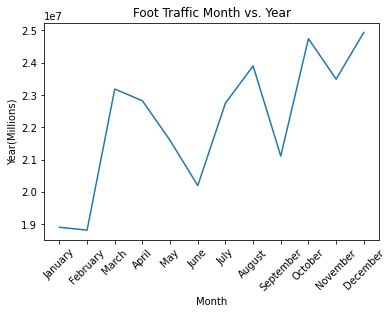

In [9]:
#Create Line chart  for 2019

x = months_list
y = [months_dict_2019["hourly_counts"][i] for i in months_list]
# plot lines
plt.plot(x, y,label = "line 1")
# plt.plot(x, y2,label = "line 2")
# plt.plot(x, y3,label = "line 3")
# plt.plot(x, y3,label = "line 4")
# plt.plot(y, x, np.month = "line 2")
# plt.plot(x, np.sin(x), label = "curve 1")
# plt.plot(x, np.cos(x), label = "curve 2")
#plt.legend(loc=("best")
plt.title("Foot Traffic Month vs. Year")
plt.xlabel("Month")
plt.xticks(rotation = 45) 
plt.ylabel("Year(Millions)")
plt.show()






In [10]:

results_2020_df = pd.DataFrame.from_records(results_2020)
results_2020_df.to_csv("foottrafficsdata2020.csv")
results_2020_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2966839,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,4,Town Hall (West),3120
1,2966840,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,17,Collins Place (South),945
2,2966841,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,18,Collins Place (North),464
3,2966842,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,53,Collins St (North),1590
4,2966843,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,2,Bourke Street Mall (South),725


In [11]:
# Data 2020 cleaning - data types
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2020_df = results_2020_df.astype(data_type_dict)

results_2020_df.dtypes

id                 int64
date_time         object
year               int64
month             object
mdate              int64
day               object
time               int64
sensor_id         object
sensor_name       object
hourly_counts    float64
dtype: object

In [12]:
# Group by months 
month  = results_2020_df[["month", "hourly_counts"]].groupby("month").sum()

In [13]:
months_dict_2020 = month.to_dict()
#months_dict_2020

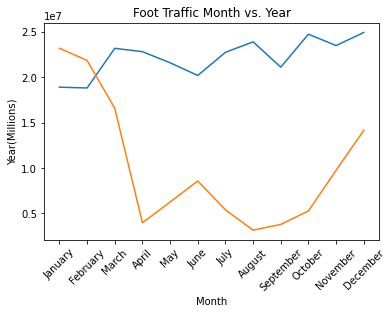

In [14]:
#Create Line chart  for 2020 and add to 2019 chart 

x = months_list
y = [months_dict_2019["hourly_counts"][i] for i in months_list]
y2 =[months_dict_2020["hourly_counts"][i] for i in months_list]
# plot lines
plt.plot(x, y,label = "line 1")
plt.plot(x, y2,label = "line 2")
plt.title("Foot Traffic Month vs. Year")
plt.xlabel("Month")
plt.xticks(rotation = 45) 
plt.ylabel("Year(Millions)")
plt.show()






In [15]:
results_2021_df = pd.DataFrame.from_records(results_2021)
results_2021_df.to_csv("foottrafficsdata2021.csv")
results_2021_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,3482939,2021-01-01T00:00:00.000,2021,January,1,Friday,0,4,Town Hall (West),1461
1,3482940,2021-01-01T00:00:00.000,2021,January,1,Friday,0,17,Collins Place (South),79
2,3482941,2021-01-01T00:00:00.000,2021,January,1,Friday,0,18,Collins Place (North),33
3,3482942,2021-01-01T00:00:00.000,2021,January,1,Friday,0,53,Collins St (North),196
4,3482943,2021-01-01T00:00:00.000,2021,January,1,Friday,0,2,Bourke Street Mall (South),236


In [16]:
# Data 2021 cleaning - data types
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2021_df = results_2021_df.astype(data_type_dict)

#results_2021_df.dtypes


In [17]:
# Group by months 
month  = results_2021_df[["month", "hourly_counts"]].groupby("month").sum()

In [18]:
months_dict_2021 = month.to_dict()
#months_dict_2021

In [19]:
#Check number are different
y2 =[months_dict_2020["hourly_counts"][i] for i in months_list]
y3 =[months_dict_2021["hourly_counts"][i] for i in months_list]


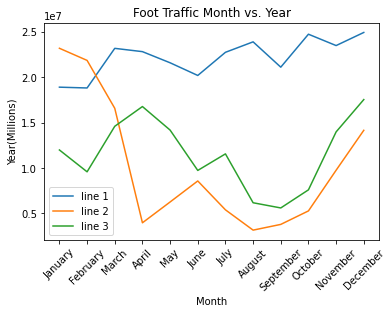

In [20]:
 #Create Line chart  for 2020 and add to 2019 chart 

x = months_list
y = [months_dict_2019["hourly_counts"][i] for i in months_list]
y2 =[months_dict_2020["hourly_counts"][i] for i in months_list]
y3 =[months_dict_2021["hourly_counts"][i] for i in months_list]
# plot lines
plt.plot(x, y,label = "line 1")
plt.plot(x, y2,label = "line 2")
plt.plot(x, y3,label = "line 3")
plt.title("Foot Traffic Month vs. Year")
plt.xlabel("Month")
plt.xticks(rotation = 45) 
plt.ylabel("Year(Millions)")
plt.legend()
plt.show()


In [21]:
#create data frame for 2022 data to include 2022 data 
results_2022_df = pd.DataFrame.from_records(results_2022)
results_2022_df.to_csv("foottrafficsdata2022.csv")
results_2022_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,4231866,2022-04-05T15:00:00.000,2022,April,5,Tuesday,15,4,Town Hall (West),2132
1,4231867,2022-04-05T16:00:00.000,2022,April,5,Tuesday,16,4,Town Hall (West),2271
2,4231868,2022-04-05T17:00:00.000,2022,April,5,Tuesday,17,4,Town Hall (West),2966
3,4231869,2022-04-05T18:00:00.000,2022,April,5,Tuesday,18,4,Town Hall (West),2242
4,4231870,2022-04-05T19:00:00.000,2022,April,5,Tuesday,19,4,Town Hall (West),2008


In [22]:
# Data 2022 cleaning - data types
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2022_df = results_2022_df.astype(data_type_dict)

#results_2022_df.dtypes

In [23]:
# Group by months 
month  = results_2022_df[["month", "hourly_counts"]].groupby("month").sum()

In [24]:
months_dict_2022 = month.to_dict()
#months_dict_2022

In [25]:
# Error as 2022 data was not available after May 2022 - confirm  months
#months_list

In [26]:
#Check number of May 
months_dict_2022['hourly_counts']['May']

16311094.0

In [27]:
#Create a list that only includes the first 5 months for 2022
list(months_dict_2022['hourly_counts'].values())

[19469918.0, 13223750.0, 12298644.0, 18275965.0, 16311094.0]

In [28]:
y4 =list(months_dict_2022['hourly_counts'].values())
# plot lines

In [29]:
x4_months = list(months_dict_2022['hourly_counts'].keys())

In [30]:
x4_months=['January',
 'February',
 'March',
 'April',
 'May']

In [31]:
#months_list

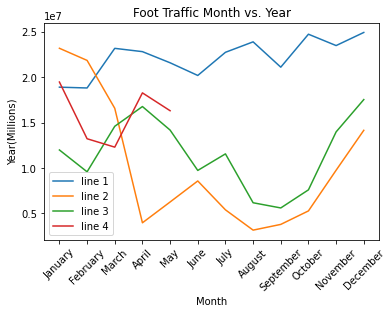

In [32]:
#Create Line chart for 2019, 2020, 2021 and 2022 ( noting 2022 only had 5 mon ths of data)

x = months_list
y = [months_dict_2019["hourly_counts"][i] for i in months_list]
y2 =[months_dict_2020["hourly_counts"][i] for i in months_list]
y3 =[months_dict_2021["hourly_counts"][i] for i in months_list]
y#4 =[months_dict_2022["hourly_counts"][i] for i in months_list]

# plot lines
plt.plot(x, y,label = "line 1")
plt.plot(x, y2,label = "line 2")
plt.plot(x, y3,label = "line 3")
plt.plot(x4_months, y4,label = "line 4")
plt.title("Foot Traffic Month vs. Year")
plt.xlabel("Month")
plt.xticks(rotation = 45) 
plt.ylabel("Year(Millions)")
plt.legend(loc='best')
plt.show()


In [ ]:
# Data 2022 groupby
# results_2022_df= results_2022_df[(results_2022_df["time"] >= 12) & (results_2022_df["time"] <= 15)]
location = results_2022_df.groupby("sensor_name")
foottrafic_2022 = location["hourly_counts"].mean()

results_2022_groupby_df = pd.DataFrame({"Av foot traffic 2022": foottrafic_2022})
results_2022_groupby_df = results_2022_groupby_df.reset_index()
results_2022_groupby_df.rename(columns={"sensor_name":"location"},inplace=True)
results_2022_groupby_df


In [ ]:
# Getting location coordinate

Location_list = results_2022_groupby_df["location"].tolist()

location = []
latitude = []
longitude = []

for i in Location_list:
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
        target_location2 = i + ", Melbourne Australia"
        params = {"address": target_location2, "key": g_key}
        response = requests.get(base_url, params=params)
        location_geo = response.json()
        lat = location_geo["results"][0]["geometry"]["location"]["lat"]
        lng = location_geo["results"][0]["geometry"]["location"]["lng"]
        print(f"{target_location2}: {lat}, {lng}")
        location.append(i)
        latitude.append(lat)
        longitude.append(lng)
    except:
        print("Target location not found")

In [ ]:
# create new df for location coordinate

location_dict = {
    "location": location,
    "Lat": latitude,
    "Lon": longitude,
    }
location_data_dict = pd.DataFrame(location_dict)

location_data_dict.head()

In [ ]:
# merging foot traffic data and coord data

data_summary_2022 = location_data_dict.merge(results_2022_groupby_df,how="left", on="location" )
data_summary_2022.to_csv ("datasummary2022.csv")
data_summary_2022.head(10)

sort_2022 = data_summary_2022.sort_values("Av foot traffic 2022", ascending=False).reset_index()
sort_2022

top_10_2022 = sort_2022.iloc[0:10,:]
top_10_2022


In [ ]:
# creating google heatmap

# location & foot traffic input
lat_long = top_10_2022[["Lat", "Lon"]]
foottrafic = top_10_2022["Av foot traffic 2022"]

# Plot Heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(lat_long, weights=foottrafic, max_intensity=2000)
fig.add_layer(heat_layer)
fig

In [ ]:
# Restaurant nearby

top_resto_name = []
top_resto_address = []
top_resto_lat = []
top_resto_lng = []

for index, row in top_10_2022.iterrows():
    phrase = f"best restaurant in {row.location} Melbourne, Australia"
    target_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"

    params = {"query": phrase,"key": g_key, "radius": 100, "type": "restaurant"}

    response = requests.get(target_url, params)
    # print(response.url)
    top_resto = response.json()
    counter = 0
    for place in top_resto["results"]:
        print(place["name"])
        print(place["formatted_address"])
        print(place["geometry"]["location"]["lat"])
        print(place["geometry"]["location"]["lng"])
        top_resto_name.append(place["name"])
        top_resto_address.append(place["formatted_address"])
        top_resto_lat.append(place["geometry"]["location"]["lat"])
        top_resto_lng.append(place["geometry"]["location"]["lng"])
        counter += 1
        if counter > 50:
            break

# phrase = f"best restaurant in Flinders La-Swanston St (West) Melbourne, Australia"
# target_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
# params = {"query": phrase,"key": g_key}

# response = requests.get(target_url, params)
# top_resto = response.json()
# # pprint(top_resto["results"]["name"])

# pprint(top_resto["results"][0]["geometry"]["location"]["lng"])

# # # pprint(top_resto)


In [ ]:
top_resto_dict = {
    "name": top_resto_name,
    "address": top_resto_address, 
    "Lat": top_resto_lat,
    "Lon": top_resto_lng,
    }
top_resto_df = pd.DataFrame(top_resto_dict)

top_resto_df
len(top_resto_df)


In [ ]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Address</dt><dd>{address}</dd>
</dl>
"""

resto_info = [info_box_template.format(**row) for index, row in top_resto_df.iterrows()]
locations = top_resto_df[["Lat", "Lon"]]

# Add marker layer ontop of heat map
marker_layer=gmaps.marker_layer(locations, info_box_content=resto_info)
fig.add_layer(marker_layer)

# Display figure
fig


## Correlation Analysis - daily average foot traffic vs. daily temperature 2019

In [ ]:
# daily temperature year 2019

weather_df = pd.read_csv("IDCJAC0010_086338_2019_Data.csv")
weather_df.head()

In [ ]:
# Data 2019 cleaning

weather_df.dtypes

In [ ]:
# Data 2019 cleaning - data types
weather_data_type_dict = {"Month":object,"Day":object}
weather_df = weather_df.astype(weather_data_type_dict)

weather_df.dtypes

In [ ]:
weather_df ["Month"] = weather_df ["Month"].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

weather_df


In [ ]:
#Still not working properly
weather_df ["month+day"] = weather_df ["Month"] + str(weather_df ["Day"])
weather_df

In [ ]:
# Data collection - year 2019 - post-covid

client = Socrata("data.melbourne.vic.gov.au", app_token="PJ7LNUcljkE0xkoj2J0AzMeU4", username="david_salim2006@hotmail.com", password="David!2022")

results_2019 = client.get("b2ak-trbp", year= 2019, limit = 10000000)

results_2019_df = pd.DataFrame.from_records(results_2019)
results_2019_df.to_csv("foottrafficsdata2019.csv")

results_2019_df.head()

In [ ]:
# Data 2019 cleaning - data types
data_type_dict2 = {"id":int,"year":int,"mdate":object,"time":int,"hourly_counts":float}
results_2019_df = results_2019_df.astype(data_type_dict2)

results_2019_df.dtypes

In [ ]:
results_2019_df ["month+day"] = results_2019_df ["month"] + results_2019_df ["mdate"]
# results_2019_df.to_csv("2019.csv")
results_2019_df

In [ ]:
# Data 2019 groupby & calculation

location_2019 = results_2019_df.groupby("month+day")
daily_foottrafic_2019 = location_2019["hourly_counts"].mean()

results_2019_groupby_df = pd.DataFrame({"Av foot traffic 2019": daily_foottrafic_2019})
results_2019_groupby_df = results_2019_groupby_df.reset_index()
results_2019_groupby_df.rename(columns={"sensor_name":"location"},inplace=True)
results_2019_groupby_df
